In [48]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

np.set_printoptions(threshold=np.nan)
pd.set_option('display.max_rows', 2000)

%matplotlib inline

def remove_categorical_columns(df):
    df.drop('MSZoning',axis=1,inplace=True)
    df.drop('Street',axis=1,inplace=True)
    df.drop('Alley',axis=1,inplace=True)
    df.drop('LotShape',axis=1,inplace=True)
    df.drop('LandContour',axis=1,inplace=True)
    df.drop('Utilities',axis=1,inplace=True)
    df.drop('LotConfig',axis=1,inplace=True)
    df.drop('LandSlope',axis=1,inplace=True)
    df.drop('Neighborhood',axis=1,inplace=True)
    df.drop('Condition1',axis=1,inplace=True)
    df.drop('Condition2',axis=1,inplace=True)
    df.drop('BldgType',axis=1,inplace=True)
    df.drop('HouseStyle',axis=1,inplace=True)
    df.drop('RoofStyle',axis=1,inplace=True)
    df.drop('RoofMatl',axis=1,inplace=True)
    df.drop('Exterior1st',axis=1,inplace=True)
    df.drop('Exterior2nd',axis=1,inplace=True)
    df.drop('MasVnrType',axis=1,inplace=True)
    df.drop('ExterQual',axis=1,inplace=True)
    df.drop('ExterCond',axis=1,inplace=True)
    df.drop('Foundation',axis=1,inplace=True)
    df.drop('BsmtQual',axis=1,inplace=True)
    df.drop('BsmtCond',axis=1,inplace=True)
    df.drop('BsmtExposure',axis=1,inplace=True)
    df.drop('BsmtFinType1',axis=1,inplace=True)
    df.drop('BsmtFinType2',axis=1,inplace=True)
    df.drop('Heating',axis=1,inplace=True)
    df.drop('HeatingQC',axis=1,inplace=True)
    df.drop('CentralAir',axis=1,inplace=True)
    df.drop('Electrical',axis=1,inplace=True)
    df.drop('KitchenQual',axis=1,inplace=True)
    df.drop('Functional',axis=1,inplace=True)
    df.drop('FireplaceQu',axis=1,inplace=True)
    df.drop('GarageType',axis=1,inplace=True)
    df.drop('GarageFinish',axis=1,inplace=True)
    df.drop('GarageQual',axis=1,inplace=True)
    df.drop('GarageCond',axis=1,inplace=True)
    df.drop('PavedDrive',axis=1,inplace=True)
    df.drop('PoolQC',axis=1,inplace=True)
    df.drop('Fence',axis=1,inplace=True)
    df.drop('MiscFeature',axis=1,inplace=True)
    df.drop('SaleType',axis=1,inplace=True)
    df.drop('SaleCondition',axis=1,inplace=True)

def input_missing_value(df):
    
    # MSSubClass as str
    df['MSSubClass'] = df['MSSubClass'].astype("str")
    #After converting this column to String, it will be treated as categorical
    #There is one value in the test set that there isn't in the training. It is 150
    #It will be result in one column for this categorical value that doesn't exist in the training set
    #It can't happen
    #There is only one value 150 in the row 1358 in the test set
    #We also can't remove any single row from the test set as we will need make predictions for all rows 
    #Let's just pass the value 150 to 40 , as this value exists in booth sets and is is the less common 
    #???df['MSSubClass'][df.MSSubClass=='150']='40'
    
    # Converting OverallCond to str
    df.OverallCond = df.OverallCond.astype("str")
    
    # KitchenAbvGr to categorical
    df['KitchenAbvGr'] = df['KitchenAbvGr'].astype("str")
    #???df.drop(df[df.KitchenAbvGr=='3'].index,inplace=True) # apenas no treino
    
    # Year and Month to categorical
    df['YrSold'] = df['YrSold'].astype("str")
    df['MoSold'] = df['MoSold'].astype("str")    
    
    #LotFrontage - insert the mean 
    imp = Imputer(missing_values='NaN', strategy='mean', axis=1)
    #print(np.shape(df['LotFrontage']))
    df['LotFrontage'] = imp.fit_transform(df['LotFrontage'].reshape(1,-1)).transpose()    
   
    #Alley
    df.Alley.fillna(inplace=True,value='No')

    #MasVnrType - remove the records where the value is NA 
    #print("Number of lines where MasVnrType has Nan value", len(df[df['MasVnrType'].isnull()]))
    #df.dropna(axis=0,subset=['MasVnrType'],inplace=True)
    #df.drop('MasVnrType',axis=1,inplace=True)
    # MasVnrType NA in all. filling with most popular values
    df.MasVnrType.fillna(value=df['MasVnrType'].mode()[0],inplace=True)
    
    #MasVnrArea - remove the hole column
    #??df.drop('MasVnrArea',axis=1,inplace=True)
    
    #Condition2 - remove the hole column Possui quantidade de tipos diferentes na base de treino e teste e apenas 
    #um dos tipos é relevante    
    #??df.drop('Condition2',axis=1,inplace=True)
    
    #RoofMatl - remove the hole column Possui quantidade de tipos diferentes na base de treino e teste e apenas 
    #um dos tipos é relevante    
    #??df.drop('RoofMatl',axis=1,inplace=True)
    

    #MSZoning   - tem NA apenas na base de teste. Como nao posso remover linhas removo a coluna   
    #df.dropna(axis=0,subset=['MSZoning'],inplace=True)
    #?????df.drop('MSZoning',axis=1,inplace=True)
    #df.MSZoning.fillna(df['MSZoning'].mode()[0])

    
    #BsmtQual
    df.BsmtQual.fillna(inplace=True,value='No')
    
    #HouseStyle - Esse valor so existe na base de treino. Ao inves de remover toda coluna removo somente as linhas 
    df.drop(df[df.HouseStyle=='2.5Fin'].index,inplace=True)
    
    #BsmtCond
    df.BsmtCond.fillna(inplace=True,value='No')

    #BsmtExposure
    df.BsmtExposure.fillna(inplace=True,value='No')

    #BsmtFinType1
    df.BsmtFinType1.fillna(inplace=True,value='No')

    #BsmtFinType2
    df.BsmtFinType2.fillna(inplace=True,value='No')

    #Electrical - remove the records where the value is NA
    #print("Number of lines where Electrical has Nan value",len(df[df['Electrical'].isnull()]))
    df.dropna(axis=0,subset=['Electrical'],inplace=True) # apenas no treino 
    df.drop(df[df.Electrical=='Mix'].index,inplace=True) # apenas no treino
    #print("Number of lines where Electrical has Nan value",len(df[df['Electrical'].isnull()]))

    #FireplaceQu
    df.FireplaceQu.fillna(inplace=True,value='No')
    

    #GarageType
    df.GarageType.fillna(inplace=True,value='No')

    #GarageYrBlt - remove the hole column
    #???df.drop('GarageYrBlt',axis=1,inplace=True)

    #GarageFinish
    df.GarageFinish.fillna(inplace=True,value='No')

    #GarageQual - A base de teste nao tem um dos tipos presente na base de treino. Assim a base de treino terá uma 
    #feature para esse tipo e a de teste não. Alem disso, apenas um tipo é pertinente
    #Achei melhor entao excluir essa coluna    
    #???df.drop('GarageQual',axis=1,inplace=True)
    
    #GarageCond
    df.GarageCond.fillna(inplace=True,value='No')

    #PoolQC
    #df.PoolQC.fillna(inplace=True,value='No')
    df.drop('PoolQC',axis=1,inplace=True)
    
    #Fence
    df.Fence.fillna(inplace=True,value='No')

    #MiscFeature
    #df.MiscFeature.fillna(inplace=True,value='No')
    df.drop('MiscFeature',axis=1,inplace=True)

    #MiscVal
    df.drop('MiscVal',axis=1,inplace=True)
    
    #SaleType
    df.drop('SaleType',axis=1,inplace=True)
    
    #Exterior1st- nao posso remover linhas do teste
    #df.dropna(axis=0,subset=['Exterior1st'],inplace=True)     
    #df.drop(df[df.Exterior1st=='Stone'].index,inplace=True)
    #df.drop(df[df.Exterior1st=='ImStucc'].index,inplace=True)
    #df.drop(df[df.Exterior1st=='CBlock'].index,inplace=True)
    df.drop('Exterior1st',axis=1,inplace=True)
    
    #Exterior2nd
    #df.dropna(axis=0,subset=['Exterior2nd'],inplace=True)
    #df.Exterior2nd.fillna(inplace=True,value= 'Other')
    #df.drop(df[df.Exterior2nd=='Other'].index,inplace=True)
    #df.drop(df[df.Exterior2nd=='CBlock'].index,inplace=True)
    df.drop('Exterior2nd',axis=1,inplace=True)
    
    #Heating -- esses tipos existem apenas na base de treino
    df.drop(df[df.Heating=='OthW'].index,inplace=True)
    df.drop(df[df.Heating=='Floor'].index,inplace=True)
    
    #KitchenQual
    #df.dropna(axis=0,subset=['KitchenQual'],inplace=True)
    #?????df.KitchenQual.fillna(inplace=True,value='Fa') #- Apenas a base de teste tem NA e como nao posso remover registro
    #dessa base setei o valor menos comum
    
    #Functional
    #df.dropna(axis=0,subset=['Functional'],inplace=True)
    df.drop('Functional',axis=1,inplace=True)
    
    #Utilities
    df.drop('Utilities',axis=1,inplace=True)
    
    #BsmtFinSF1
    #df.dropna(axis=0,subset=['BsmtFinSF1'],inplace=True)
    df['BsmtFinSF1'] = imp.fit_transform(df['BsmtFinSF1'].reshape(1,-1)).transpose()    
    
    #BsmtFinSF2
    #df.dropna(axis=0,subset=['BsmtFinSF2'],inplace=True)
    df['BsmtFinSF2'] = imp.fit_transform(df['BsmtFinSF2'].reshape(1,-1)).transpose()    
    
    #BsmtUnfSF
    #df.dropna(axis=0,subset=['BsmtUnfSF'],inplace=True)
    df.drop('BsmtUnfSF',axis=1,inplace=True)
    
    #TotalBsmtSF
    #df.dropna(axis=0,subset=['TotalBsmtSF'],inplace=True)
    #df['TotalBsmtSF'] = imp.fit_transform(df['TotalBsmtSF']).transpose()    
    df.TotalBsmtSF.fillna(value=0,inplace=True)
    
    #BsmtFullBath - apenas na base de teste tem NA.Nao posso remover a linha
    df.BsmtFullBath.fillna(inplace=True,value=0)
    
    #BsmtHalfBath- apenas na base de teste tem NA.Nao posso remover a linha
    df.BsmtHalfBath.fillna(inplace=True,value=0)
    
    #GarageCars
    #df.dropna(axis=0,subset=['GarageCars'],inplace=True)
    df.GarageCars.fillna(value=0,inplace=True)
    
    #GarageArea
    #df.dropna(axis=0,subset=['GarageArea'],inplace=True)
    df.GarageArea.fillna(value=0,inplace=True)
    
    #END
    
    
df = pd.read_csv("train.csv",na_values=['?',''],delimiter=',',delim_whitespace=False)
df_test = pd.read_csv("test.csv",na_values=['?',''],delimiter=',',delim_whitespace=False)

print(df.shape)
print(df_test.shape)
#print(df.head())
#print(df.describe())
#print(df.dtypes)
#df = df.dropna()



from sklearn.preprocessing import Imputer


########################Dealing with missing values

#missing data
# total = df.isnull().sum().sort_values(ascending=False)
# percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
# missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# print(missing_data.head(20))

data_aux = df.append(df_test)

print("Missing values before: " , data_aux.columns[data_aux.isnull().any()])

[(data_aux[i].fillna(inplace=True,value='No')) for i in data_aux.columns[data_aux.dtypes=='Object']   ]

input_missing_value(data_aux)

df = data_aux.iloc[:-df_test.shape[0],:]
df_test = data_aux.iloc[:df_test.shape[0],:]

df_test.drop('SalePrice',inplace=True,axis=1)

#Valores numericos que continham NA sao detectados como String. Assim, depois que removemos o NA temos que setar corretamente 
#o tipo 
df_test.BsmtFullBath = df_test.BsmtFullBath.astype("int64")
df_test.BsmtHalfBath = df_test.BsmtHalfBath.astype("int64")
df_test.GarageCars = df_test.GarageCars.astype("int64")
df_test.GarageArea = df_test.GarageArea.astype("int64")

print("Shape after treating missing values")
print(df.shape)
print(df_test.shape)
print(df.dtypes)
print("Null values treino \n", df.columns[df.isnull().any()])
print("Null values test \n", df_test.columns[df_test.isnull().any()])

########################End dealing with missing values


# The OneHotEncoder converts features represented as numeric codes (so they are values that can't be ordered)
#to their binary representation
#enc = preprocessing.OneHotEncoder() 
#df = enc.fit_transform(df)


########################Tratando campos nominais

vec = DictVectorizer()
aux = np.asmatrix(vec.fit_transform(df.transpose().to_dict().values()).toarray())
#data_train = pd.DataFrame(aux,columns=vec.feature_names_)
data_train = pd.get_dummies(df)
data_train.to_csv('train_no_categorical.csv')

print("New shape train:" , np.shape(data_train))
print("Indice da coluna SalePrice no novo dataset" , data_train.columns.get_loc('SalePrice'))


################################################# Base de teste

vec = DictVectorizer()
aux_test = vec.fit_transform(df_test.transpose().to_dict().values()).toarray()
#data_test = pd.DataFrame(aux_test,columns=vec.feature_names_)
data_test = pd.get_dummies(df_test) 
print("New shape test:" , np.shape(data_test))
data_test.to_csv('test_no_categorical.csv')


print("Colunas que existem apenas teste : " , data_test.columns.difference(data_train.columns))
print("Colunas que existem apenas treino : " , data_train.columns.difference(data_test.columns))


(1460, 81)
(1459, 80)
Missing values before:  Index(['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'Electrical', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Functional', 'GarageArea', 'GarageCars',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt',
       'KitchenQual', 'LotFrontage', 'MSZoning', 'MasVnrArea', 'MasVnrType',
       'MiscFeature', 'PoolQC', 'SalePrice', 'SaleType', 'TotalBsmtSF',
       'Utilities'],
      dtype='object')
Shape after treating missing values
(1435, 72)
(1459, 71)
1stFlrSF           int64
2ndFlrSF           int64
3SsnPorch          int64
Alley             object
BedroomAbvGr       int64
BldgType          object
BsmtCond          object
BsmtExposure      object
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtFinType1      object
BsmtFinType2      object
BsmtFullBath     float64
BsmtHal

count      1445.000000
mean     181043.215225
std       79195.218195
min       34900.000000
25%      130000.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


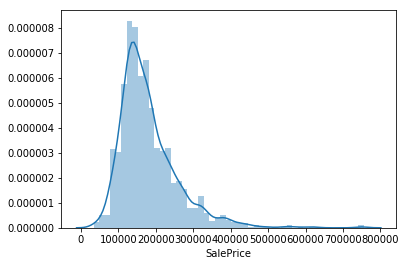

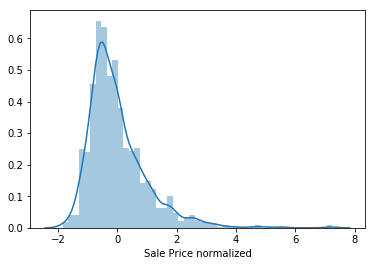

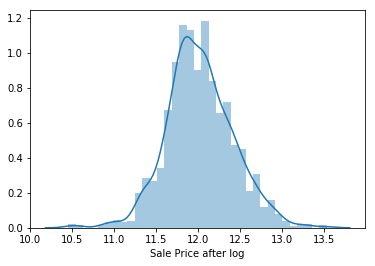

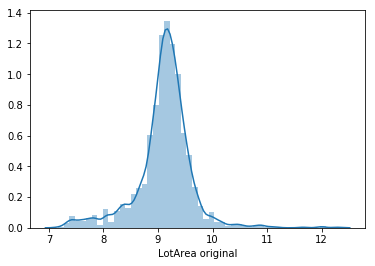

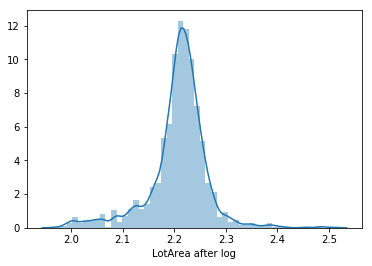

In [26]:
from scipy.stats import norm
from scipy import stats


print(data_train.SalePrice.describe())

sns.distplot(data_train['SalePrice']);
#plt.hist(data_train['SalePrice'],bins=50,label="SalePrice original")
plt.show()
saleprice_scaled = preprocessing.StandardScaler().fit_transform((data_train['SalePrice'][:,np.newaxis]));
sns.distplot(saleprice_scaled,axlabel="Sale Price normalized")
#plt.hist(saleprice_scaled,bins=50,label="SalePrice normalized")
plt.show()
saleprice_log = np.log(data_train['SalePrice'])
sns.distplot(saleprice_log,axlabel="Sale Price after log")
#plt.hist(saleprice_log,bins=50,label="SalePrice after log transformation")
plt.show()
sns.distplot(data_train['LotArea'],axlabel="LotArea original")
#plt.hist(data_train['LotArea'],bins=50,label="LotArea original")
plt.show()
sns.distplot(np.log(data_train['LotArea']),axlabel="LotArea after log")
#plt.hist(np.log(data_train['LotArea']),bins=50,label="LotArea after log")


#data_train['SalePrice'] = np.log1p(data_train['SalePrice'])
#data_train['OverallQual'] = np.log1p(data_train['OverallQual'])
#data_train['LotArea'] = np.log1p(data_train['LotArea'])
#data_test['OverallQual'] = np.log1p(data_test['OverallQual'])
#data_test['LotArea'] = np.log1p(data_test['LotArea'])



In [3]:
# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df,name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name,x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)
    





In [4]:
print("\n Tentativa de selecionar melhores features \n")

from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel


#Removing features with low variance
#print("Original shape: {}".format(np.shape(df.iloc[:,0:-1])))
#sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
#features = sel.fit_transform(df.iloc[:,0:-1])
#print("Shape apos Removing features with low variance {}".format(np.shape(features))) #nenhuma foi selecionada 
#print("\n")

#Tree-based feature selection
y_train = (data_train['SalePrice'])
x_train = (data_train.drop('SalePrice',axis=1))

print()

clf = ExtraTreesRegressor(n_estimators=20)
clf = clf.fit(x_train,y_train)
data = np.zeros((1,x_train.shape[1])) 
data = pd.DataFrame(data, columns=x_train.columns)
data.iloc[0] = clf.feature_importances_
data = data.T.sort_values(df.index[0], ascending=False).T


print("As features selecionadas com Tree-based feature selection foram: \n")
yyy = np.asarray((data.columns[0:27]))
xxx = np.asarray((data.iloc[:,0:27]))
print(yyy)
print(xxx)

model = SelectFromModel(clf, prefit=True)
aux = model.transform(x_train)

print("\n New shape train apos Tree-based feature selection: {}".format(aux.shape))

print("\n Fim tentativa selecionar melhores features \n")


data_train_less_features = pd.concat([pd.DataFrame(aux),pd.DataFrame(y_train)],axis=1)
data_train_less_features.to_csv('data_train_less_features.csv')


aux = model.transform((data_test))
data_test_less_features = pd.DataFrame(aux)
print("\n New shape test apos Tree-based feature selection: {}".format(aux.shape))
data_test_less_features.to_csv('data_test_less_features.csv')


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn   import metrics
from sklearn.model_selection import train_test_split




 Tentativa de selecionar melhores features 


As features selecionadas com Tree-based feature selection foram: 

['OverallQual' 'ExterQual=TA' 'GarageCars' 'BsmtQual=Ex' 'GrLivArea'
 'Neighborhood=NoRidge' '1stFlrSF' 'FireplaceQu=No' 'FullBath' '2ndFlrSF'
 'TotalBsmtSF' 'TotRmsAbvGrd' 'BsmtFinSF1' 'LotArea' 'YearRemodAdd'
 'GarageArea' 'MSSubClass=60' 'Fireplaces' 'BsmtQual=Gd'
 'GarageType=Attchd' 'ExterQual=Gd' 'BedroomAbvGr' 'BsmtFullBath'
 'KitchenQual=TA' 'ExterQual=Fa' 'CentralAir=Y' 'BsmtExposure=Gd']
[[ 0.21188874  0.2008164   0.1150634   0.07637303  0.068089    0.02550033
   0.01807944  0.01655713  0.01599382  0.01287374  0.010767    0.00908296
   0.00788974  0.00696403  0.00657639  0.00651448  0.00552107  0.00549636
   0.00528581  0.00477036  0.00477009  0.00471935  0.00463137  0.00443801
   0.00423207  0.00416343  0.00415397]]

 New shape train apos Tree-based feature selection: (1445, 27)

 Fim tentativa selecionar melhores features 


 New shape test apos Tree-based featu

In [5]:
#Starting making predictors

from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV, Lasso, LassoCV, ElasticNetCV

#Caso 1 - Linear Regression 
print("Linear Regression ")

# Shuffle
np.random.seed(42)
data_train = data_train.reindex(np.random.permutation(data_train.index))
data_train.reset_index(inplace=True, drop=True)


#Normalization
y_train = ((data_train['SalePrice']))
x_train = (data_train.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train_scaled = scaler.transform((x_train))

classifier = LinearRegression()
kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0
pred = []

for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    


print("\n\n")
print("SGDRegressor \n\n")


classifier = SGDRegressor()

kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0
pred = []
for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    


print("\n\n")
print("Ridge \n\n")


classifier = RidgeCV()

kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0
pred = []
for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    


print("\n\n")
print("Lasso \n\n")


classifier = LassoCV()

kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0
pred = []
for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    


print("\n\n")
print("Elastic Net \n\n")


classifier = ElasticNetCV()

kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0
pred = []
for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    



###########Less features

print("\n\n Less Features")
print("Linear Regression \n")
#Normalization
y_train = ((data_train_less_features['SalePrice']))
x_train = (data_train_less_features.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train_scaled = scaler.transform((x_train))


classifierLinearRegression = LinearRegression()
kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0
pred = []

for training, test in kf.split(x_train):
    fold+=1
    print("Fold #{}".format(fold))
    pred = []    
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifierLinearRegression = classifierLinearRegression.fit(x_train_fold, y_train_fold)
    pred = classifierLinearRegression.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifierLinearRegression.score(X=x_test_fold,y=y_test_fold))

  
#Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    

# Write the cross-validated prediction
pred = []
pred = np.array(pred)
pred = classifierLinearRegression.predict(scaler.transform(data_test_less_features))
pd.DataFrame({'Id': range(1461,2920), 'SalePrice': pred}).to_csv('pred_LinearRegression.csv', index =False)  

#result = pd.DataFrame(pred,columns=['SalePrice'], index=range(1461,2920))
#result.to_csv('pred_LinearRegression.csv', columns=['SalePrice'])




print("\n\n")
print("SGDRegressor \n\n")

classifier = SGDRegressor()

kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0
pred = []
for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    

print("\n\n")
print("Ridge \n\n")


classifier = RidgeCV()

kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0
pred = []
for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    


Linear Regression 
Fold #1
Fold score (RMSE): 792507042910496768.00
Accuracy: -101813892814892254915198976.000
Fold #2
Fold score (RMSE): 73492366810621184.00
Accuracy: -865784988953721866027008.000
Fold #3
Fold score (RMSE): 104478007166089504.00
Accuracy: -1526623675318398248550400.000
Fold #4
Fold score (RMSE): 414068993786018432.00
Accuracy: -31642084218901363142164480.000
Fold #5
Fold score (RMSE): 24886.34
Accuracy: 0.901

 Average RMSE: 4.039399278701055e+17



SGDRegressor 


Fold #1
Fold score (RMSE): 45946.10
Accuracy: 0.658
Fold #2
Fold score (RMSE): 3073325.92
Accuracy: -1513.059
Fold #3
Fold score (RMSE): 1006819.61
Accuracy: -140.770
Fold #4
Fold score (RMSE): 927466.92
Accuracy: -157.751
Fold #5
Fold score (RMSE): 295805.78
Accuracy: -12.941

 Average RMSE: 1510551.218061962



Ridge 


Fold #1
Fold score (RMSE): 30437.69
Accuracy: 0.850
Fold #2
Fold score (RMSE): 26394.21
Accuracy: 0.888
Fold #3
Fold score (RMSE): 33728.04
Accuracy: 0.841
Fold #4
Fold score (RMSE): 5649

In [6]:
#Caso 3 - SVM
from sklearn.svm import SVR
from sklearn.svm import NuSVR

print("SVM")

# Shuffle
np.random.seed(42)
data_train = data_train.reindex(np.random.permutation(data_train.index))
data_train.reset_index(inplace=True, drop=True)

#Normalization
y_train = ((data_train['SalePrice']))
x_train = (data_train.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train = scaler.transform((x_train))
x_train = np.ascontiguousarray(x_train)


classifier = SVR(kernel='linear', C=1e4) #34761.27693615821
kf = KFold(5)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    


# The mean squared error
#pred = classifier.predict(x_test_scaled)
#score = metrics.mean_squared_error(y_test, pred)
#print("Final, out of sample score (RMSE): {}".format(score))    

# Evaluate success using accuracy
#print("Final Accuracy: %.3f" % classifier.score(X=x_test_scaled,y=y_test))

###########Less features
print("\n\n Less features \n")
#Normalization
y_train = ((data_train_less_features['SalePrice']))
x_train = (data_train_less_features.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train = scaler.transform((x_train))
x_train = np.ascontiguousarray(x_train)


#classifier = SVR(kernel='rbf', C=1e3, gamma=0.1) #66483.84692815947
classifierSVR = SVR(kernel='linear', C=1e4) #34761.27693615821
#classifier = SVR(kernel='poly', C=1e3, degree=3) #86747.4465877091
#classifier = NuSVR(C=1e3) #57249.1589623674

kf = KFold(10, random_state=7)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train[test]
    y_test_fold = y_train[test]
    
    classifierSVR = classifierSVR.fit(x_train_fold, y_train_fold)
    pred = classifierSVR.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifierSVR.score(X=x_test_fold,y=y_test_fold))

    

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    

# Write the cross-validated prediction
pred = []
pred = np.array(pred)
pred = classifierSVR.predict(scaler.transform(data_test_less_features))
pd.DataFrame({'Id': range(1461,2920), 'SalePrice': pred}).to_csv('pred_SVR.csv', index =False)  

#result = pd.DataFrame(pred,columns=['SalePrice'], index=range(1461,2920))
#result.to_csv('pred_SVR.csv', columns=['SalePrice'])



SVM
Fold #1
Fold score (RMSE): 41004.61
Accuracy: 0.685
Fold #2
Fold score (RMSE): 23876.22
Accuracy: 0.876
Fold #3
Fold score (RMSE): 40195.25
Accuracy: 0.816
Fold #4
Fold score (RMSE): 23168.52
Accuracy: 0.913
Fold #5
Fold score (RMSE): 25784.33
Accuracy: 0.894

 Average RMSE: 31839.35367031111


 Less features 

Fold #1
Fold score (RMSE): 23895.80
Accuracy: 0.877
Fold #2
Fold score (RMSE): 24113.55
Accuracy: 0.900
Fold #3
Fold score (RMSE): 25777.01
Accuracy: 0.907
Fold #4
Fold score (RMSE): 41921.73
Accuracy: 0.713
Fold #5
Fold score (RMSE): 36984.35
Accuracy: 0.849
Fold #6
Fold score (RMSE): 29045.86
Accuracy: 0.858
Fold #7
Fold score (RMSE): 25945.54
Accuracy: 0.870
Fold #8
Fold score (RMSE): 27181.87
Accuracy: 0.854
Fold #9
Fold score (RMSE): 60157.57
Accuracy: 0.544
Fold #10
Fold score (RMSE): 24741.60
Accuracy: 0.888

 Average RMSE: 33798.850676012655


In [7]:
from sklearn.neural_network import MLPRegressor

# Shuffle
print("NN MLPRegressor")
np.random.seed(42)
data_train = data_train.reindex(np.random.permutation(data_train.index))
data_train.reset_index(inplace=True, drop=True)


#Normalization
y_train = ((data_train['SalePrice']))
x_train = (data_train.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train_scaled = scaler.transform((x_train))


classifier = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,4,2), random_state=1)
kf = KFold(5)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    

# The mean squared error
#pred = classifier.predict(x_test_scaled)
#score = metrics.mean_squared_error(y_test, pred)
#print("Final, out of sample score (RMSE): {}".format(score))    

# Evaluate success using accuracy
#print("Final Accuracy: %.3f" % classifier.score(X=x_test_scaled,y=y_test))

###########Less features
print("\n\n")
#Normalization
y_train = ((data_train_less_features['SalePrice']))
x_train = (data_train_less_features.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train_scaled = scaler.transform((x_train))


classifier = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(8,2), random_state=1)
kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    


NN MLPRegressor
Fold #1
Fold score (RMSE): 35128.84
Accuracy: 0.755
Fold #2
Fold score (RMSE): 51551.83
Accuracy: 0.566
Fold #3
Fold score (RMSE): 39832.25
Accuracy: 0.762
Fold #4
Fold score (RMSE): 50935.52
Accuracy: 0.633
Fold #5
Fold score (RMSE): 42441.85
Accuracy: 0.715

 Average RMSE: 44438.66231575653



Fold #1
Fold score (RMSE): 27672.67
Accuracy: 0.855
Fold #2
Fold score (RMSE): 39092.97
Accuracy: 0.766
Fold #3
Fold score (RMSE): 37810.12
Accuracy: 0.812
Fold #4
Fold score (RMSE): 29686.46
Accuracy: 0.829
Fold #5
Fold score (RMSE): 49945.20
Accuracy: 0.629

 Average RMSE: 37681.43233309821


In [8]:
##Random Forests
from sklearn.ensemble import RandomForestRegressor

# Shuffle
print("Random Forests")
np.random.seed(42)
data_train = data_train.reindex(np.random.permutation(data_train.index))
data_train.reset_index(inplace=True, drop=True)

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(data_train.drop('SalePrice',axis=1), data_train['SalePrice'], 
                                                    test_size=0.20, random_state=42)

classifierAllFeatures = RandomForestRegressor(n_estimators=60,oob_score=True)

classifierAllFeatures.fit(x_train, y_train)

# The mean squared error
pred = classifierAllFeatures.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(y_test, pred))
print("Mean squared error using all features and no normalization: {}".format(score))
# Evaluate success using accuracy
print("Accuracy using all features and no normalization: %.3f" % classifierAllFeatures.score(X=x_test,y=y_test))
print("\n\n")


y_train = ((data_train['SalePrice']))
x_train = (data_train.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train = scaler.transform((x_train))

#classifier = RandomForestRegressor(n_estimators=1000,oob_score=True)

kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train):
    fold+=1
    #print("Fold #{}".format(fold))
        
    x_train_fold = x_train[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train[test]
    y_test_fold = y_train[test]
    
    classifierAllFeatures.fit(x_train_fold, y_train_fold)
    pred = classifierAllFeatures.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    #print("Fold score (RMSE): {}".format(score))

    # Evaluate success using accuracy
    #print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE using all features, cross validation and normalizing: {}".format(score))    
print("\n oob score using all features cross validation and normalizing: {}".format(classifierAllFeatures.oob_score_))    

# Write the cross-validated prediction
pred = []
pred = np.array(pred,dtype='int64')
pred = classifierAllFeatures.predict(scaler.transform(data_test))
pd.DataFrame({'Id': range(1461,2920), 'SalePrice': pred}).to_csv('pred_RF_full_features.csv', index =False)  

#result = pd.DataFrame(pred,columns=['SalePrice'], index=range(1461,2920))
#result.to_csv('pred_RF_full_features.csv', columns=['SalePrice'])

###########Less features
print("\n\n Less features \n\n")

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(data_train_less_features.drop('SalePrice',axis=1), 
                                    data_train_less_features['SalePrice'], test_size=0.20, random_state=42)

classifierRF_lessFeatures = RandomForestRegressor(n_estimators=60,oob_score=True)

classifierRF_lessFeatures.fit(x_train, y_train)

# The mean squared error
pred = classifierRF_lessFeatures.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(y_test, pred))
print("Mean squared error using less features and no normalization: {}".format(score))
# Evaluate success using accuracy
print("Accuracy using less features and no normalization: %.3f" % classifierRF_lessFeatures.score(X=x_test,y=y_test))
print("\n\n")


y_train = ((data_train_less_features['SalePrice']))
x_train = (data_train_less_features.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train = scaler.transform((x_train))

kf = KFold(n_splits=5, random_state=7)    

oos_y = []
oos_pred = []
fold = 0
pred = []

#classifierRandomForestRegressor = RandomForestRegressor(n_estimators=1000,oob_score=True,max_depth=3)

for training, test in kf.split(x_train):
    fold+=1
    #print("Fold #{}".format(fold))
        
    x_train_fold = x_train[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train[test]
    y_test_fold = y_train[test]
    
    classifierRF_lessFeatures.fit(x_train_fold, y_train_fold)
    pred = classifierRF_lessFeatures.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    #print("Fold score (RMSE): {}".format(score))

    # Evaluate success using accuracy
    #print("Accuracy: %.3f" % classifierRandomForestRegressor.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE (corss) less features, normalizing: {}".format(score))    
print("\n oob score (cross) less features, normalizing: {}".format(classifierRF_lessFeatures.oob_score_))    


# Write the cross-validated prediction
pred = []
pred = np.array(pred,dtype='int64')
pred = classifierRF_lessFeatures.predict(scaler.transform(data_test_less_features))
pd.DataFrame({'Id': range(1461,2920), 'SalePrice': pred}).to_csv('pred_RF_less_features.csv', index =False)  

#result = pd.DataFrame(pred,columns=['SalePrice'], index=range(1461,2920))
#result.to_csv('pred_RF_less_features.csv', columns=['SalePrice'])




Random Forests
Mean squared error using all features and no normalization: 27947.646141741396
Accuracy using all features and no normalization: 0.868




 Average RMSE using all features, cross validation and normalizing: 30054.871053249823

 oob score using all features cross validation and normalizing: 0.859081106808946


 Less features 


Mean squared error using less features and no normalization: 29027.08595237163
Accuracy using less features and no normalization: 0.863




 Average RMSE (corss) less features, normalizing: 28967.82333861196

 oob score (cross) less features, normalizing: 0.8421968726676903


In [9]:
from sklearn.ensemble import GradientBoostingRegressor


# Shuffle
np.random.seed(42)
data_train_less_features = data_train_less_features.reindex(np.random.permutation(data_train_less_features.index))
data_train_less_features.reset_index(inplace=True, drop=True)

y_train = ((data_train_less_features['SalePrice']))
x_train = (data_train_less_features.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train = scaler.transform((x_train))


# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x_train,y_train,test_size=0.20, random_state=42)



classifierGBR = GradientBoostingRegressor(n_estimators=1100, learning_rate=0.05, 
                                               min_samples_leaf=25, min_samples_split=20, loss='huber').fit(x_train, y_train)

# The mean squared error
pred = classifierGBR.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(y_test, pred))
print("Mean squared error: {}".format(score))
# Evaluate success using accuracy
print("Accuracy: %.3f" % classifierGBR.score(X=x_test,y=y_test))
print("\n\n")



# Shuffle
np.random.seed(42)
data_train_less_features = data_train_less_features.reindex(np.random.permutation(data_train_less_features.index))
data_train_less_features.reset_index(inplace=True, drop=True)

y_train = ((data_train_less_features['SalePrice']))
x_train = (data_train_less_features.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train = scaler.transform((x_train))


# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x_train,y_train,test_size=0.20, random_state=43)

classifierGBR.fit(x_train, y_train)

# The mean squared error
pred = classifierGBR.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(y_test, pred))
print("Mean squared error: {}".format(score))
# Evaluate success using accuracy
print("Accuracy: %.3f" % classifierGBR.score(X=x_test,y=y_test))
print("\n\n")

#save the contest result 
predGBR = []
predGBR = np.array(pred,dtype='int64')
predGBR = classifierGBR.predict(scaler.transform(data_test_less_features))
pd.DataFrame({'Id': range(1461,2920), 'SalePrice': predGBR}).to_csv('pred_GBR.csv', index =False)  

#result = pd.DataFrame(pred,columns=['SalePrice'], index=range(1461,2920))
#result.to_csv('pred_GBR.csv', columns=['SalePrice'])



Mean squared error: 31663.48530580662
Accuracy: 0.812



Mean squared error: 36323.619629319466
Accuracy: 0.797





In [10]:
import tensorflow as tf

import tensorflow.contrib.learn as learn
import shutil 
import os

sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

# Set the desired TensorFlow output level for this example
tf.logging.set_verbosity(tf.logging.ERROR)

# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df,target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)

    # find out the type of the target column.  Is it really this hard? :(
    target_type = df[target].dtypes
    target_type = target_type[0] if hasattr(target_type, '__iter__') else target_type
    
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        return df.as_matrix(result).astype(np.float32),df.as_matrix([target]).astype(np.int32)
    else:
        # Regression
        return df.as_matrix(result).astype(np.float32),df.as_matrix([target]).astype(np.float32)


    # Get a new directory to hold checkpoints from a neural network.  This allows the neural network to be
# loaded later.  If the erase param is set to true, the contents of the directory will be cleared.
def get_model_dir(name,erase=False):
    base_path = os.path.join(".","dnn")
    model_dir = os.path.join(base_path,name)
    os.makedirs(model_dir,exist_ok=True)
    if erase and len(model_dir)>4 and os.path.isdir(model_dir):
        shutil.rmtree(model_dir,ignore_errors=True) # be careful, this deletes everything below the specified path
    return model_dir


#Normalization
# y_train = ((data_train['SalePrice']))
# x_train = (data_train.drop('SalePrice',axis=1))
# scaler = preprocessing.StandardScaler().fit((x_train))
# x_train_scaled = scaler.transform((x_train))



#Normalization
#x_train,y_train = to_xy(data_train_less_features,"SalePrice")
y_train = ((data_train_less_features['SalePrice']))
x_train = (data_train_less_features.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train_scaled = scaler.transform((x_train))


#Choose an optimizer
#opt=tf.train.AdamOptimizer(learning_rate=0.01)
#opt=tf.train.MomentumOptimizer(learning_rate=0.001,momentum=0.9)

feature_columns = [tf.contrib.layers.real_valued_column("", dimension=x_train.shape[1])]
classifierDNN = learn.DNNRegressor(
                                    #hidden_units=[200,100, 80, 80, 50, 50, 80,80], 
                                    hidden_units=[ 80, 80, 20], 
                                   feature_columns=feature_columns,
                                   model_dir=get_model_dir("dnn",True)
                                   #optimizer=opt
                                  )


kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    # Early stopping
    validation_monitor = tf.contrib.learn.monitors.ValidationMonitor(
    x_test_fold,
    y_test_fold,
    every_n_steps=500,
    #metrics=validation_metrics,
    early_stopping_metric="loss",
    early_stopping_metric_minimize=True,
    early_stopping_rounds=400)
        
    classifierDNN.fit(x_train_fold, y_train_fold, monitors=[validation_monitor] ,steps=1000)
    pred = (list(classifierDNN.predict(x_test_fold, as_iterable=True)))
    
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))


# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    
print("\n\n")

#Save the contest result
pred = (list(classifierDNN.predict(scaler.transform(data_test_less_features),as_iterable=True)))
#pred = list(classifierDNN.predict(scaler.transform(data_test),as_iterable=True))
pd.DataFrame({'Id': range(1461,2920), 'SalePrice': pred}).to_csv('pred_DNN.csv', index =False)  
#result = pd.DataFrame(pred,columns=['SalePrice'], index=range(1461,2920))
#result.to_csv('pred_DNN.csv', columns=['SalePrice'])



Fold #1
Fold score (RMSE): 49056.13
Fold #2
Fold score (RMSE): 26331.03
Fold #3
Fold score (RMSE): 36993.68
Fold #4
Fold score (RMSE): 22260.49
Fold #5
Fold score (RMSE): 21280.94

 Average RMSE: 32914.33447990493





In [11]:
# Voting Ensemble for Classification
from sklearn.ensemble import VotingClassifier

y_train = ((data_train_less_features['SalePrice']))
x_train = (data_train_less_features.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train = scaler.transform((x_train))

# estimators = []
# estimators.append(('linear',classifierLinearRegression))
# estimators.append(('svr',classifierSVR))
# estimators.append(('rf',classifierRandomForestRegressor))

# # # create the ensemble model
# ensemble = VotingClassifier(estimators,voting='hard')
# ensemble = ensemble.fit(x_train,y_train)
# pred = []
# pred = np.array(pred,dtype='float64')
# pred = ensemble.predict(scaler.transform(data_test_less_features))
# result = pd.DataFrame(pred,columns=['SalePrice'], index=range(1461,2920))
# result.to_csv('pred_EnsembleVoting.csv', columns=['SalePrice'])


#Emsemble via stacking
from mlxtend.regressor import StackingRegressor

stregr = StackingRegressor(regressors=[classifierLinearRegression
                                       ,classifierSVR
                                       ,classifierRF_lessFeatures
                                       ,classifierGBR], 
                           meta_regressor=classifierLinearRegression)
stregr.fit(x_train,y_train)
pred = []
pred = np.array(pred)
pred = stregr.predict(scaler.transform(data_test_less_features))
pd.DataFrame({'Id': range(1461,2920), 'SalePrice': pred}).to_csv('pred_EnsembleStacker.csv', index =False)  

#result = pd.DataFrame(pred,columns=['SalePrice'], index=range(1461,2920))
#result.to_csv('pred_EnsembleStacker.csv', columns=['SalePrice'])


#Emsemble via avereging
dnn=[]
#dnn = list(classifierDNN.predict(scaler.transform(data_test_less_features),as_iterable=True))

final_labels = (
                (classifierLinearRegression.predict(scaler.transform(data_test_less_features)))  
                + (classifierSVR.predict(scaler.transform(data_test_less_features))) 
                + (classifierRF_lessFeatures.predict(scaler.transform(data_test_less_features)))
                + (classifierGBR.predict(scaler.transform(data_test_less_features)))                 
                #+ dnn
               
               ) / 4

## Saving to CSV
pd.DataFrame({'Id': range(1461,2920), 'SalePrice': final_labels}).to_csv('pred_EnsembleAvereging.csv', index =False)  

print("Finished")

Finished
